Exercise for Computer Vision from chapter 3 of this book :  [Machine Learning for Finance](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-finance)

In [1]:
import cv2
import tensorflow as tf
import numpy as np

In [2]:
url = "https://solarianprogrammer.com/images/2019/10/21/clouds.jpg"
img_path = tf.keras.utils.get_file('cclouds.jpg', origin=url)
img = cv2.imread(img_path)

90112/83366 [================================] - 0s 0us/step


In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow("Over the Clouds",img)
#cv2.imshow("Over the Clouds - gray",gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [8]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [11]:
model = Sequential()
img_shape = (28,28,1)
model.add(Conv2D(filters=6,
                 kernel_size=3,
                 strides=1,
                 padding='valid',
                 input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.0777 - acc: 0.9756 - val_loss: 0.0747 - val_acc: 0.9773
Epoch 2/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.0658 - acc: 0.9799 - val_loss: 0.0583 - val_acc: 0.9820
Epoch 3/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.0567 - acc: 0.9822 - val_loss: 0.0662 - val_acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.0630 - val_acc: 0.9812
Epoch 5/5
60000/60000 [==============================] - 25s 415us/step - loss: 0.0499 - acc: 0.9841 - val_loss: 0.0628 - val_acc: 0.9826


In [14]:
import matplotlib.pyplot as plt

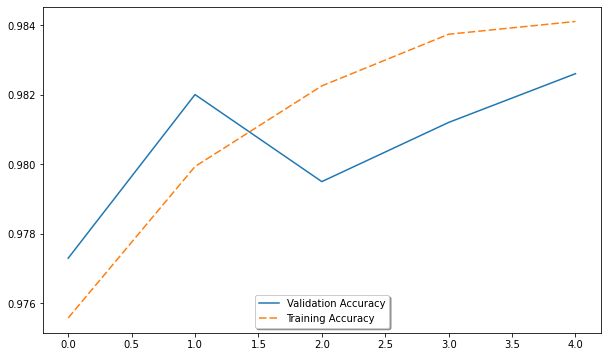

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'], dashes=[5,2], label='Training Accuracy')
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 12)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)              

In [17]:

from keras.applications.vgg16 import VGG16

In [18]:
vgg_model = VGG16(include_top=False, input_shape=(150,150,3))

In [19]:
vgg_model.layers

In [20]:
for layer in vgg_model.layers:
    layer.trainable = False

In [21]:
finetune = Sequential(layers = vgg_model.layers)
finetune.add(Flatten())
finetune.add(Dense(12))
finetune.add(Activation('softmax'))

In [22]:
finetune.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['acc'])

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#!wget https://storage.googleapis.com/aibootcamp/data/plants.zip

In [25]:
imgen = ImageDataGenerator(rescale=1/255)
train_generator = imgen.flow_from_directory('train',batch_size=32, target_size=(150,150))
validation_generator = imgen.flow_from_directory('validation',
                                                 batch_size=32, 
                                                 target_size=(150,150))

FileNotFoundError: [Errno 2] No such file or directory: 'train'

In [ ]:
finetune.fit_generator(train_generator,epochs=8, steps_per_epoch=4606//32,validation_data=validation_generator, validation_steps=144//32)